In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare, kstest, normaltest, shapiro

In [3]:
column_names = ["ID", "weight", "batch"]
df = pd.read_csv("source/euroweight.dat.txt", sep='\t', names=column_names, index_col=0)
df

,weight,batch
ID,,
1,7.512,1
2,7.502,1
3,7.461,1
4,7.562,1
5,7.528,1
...,...,...
1996,7.514,8
1997,7.519,8
1998,7.606,8


In [4]:
num_bins = int(1 + np.floor(np.log2(df.shape[0])))
num_bins

11

Проверка веса монет

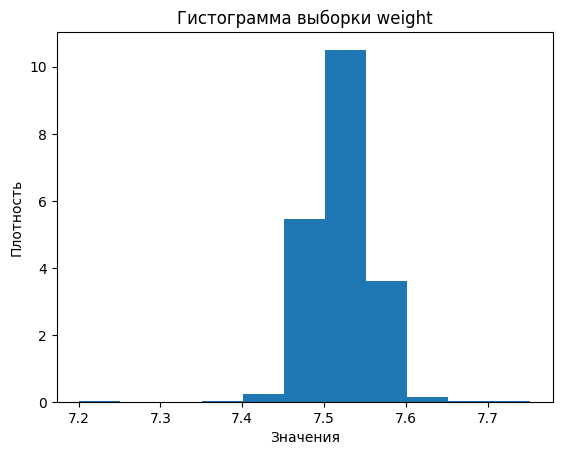

In [5]:
plt.hist(df['weight'], bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки weight')
plt.show()

In [6]:
histogram_weight, bin_edges_weight = np.histogram(df['weight'], bins=num_bins)
observed_freq_weight = histogram_weight
observed_freq_weight, bin_edges_weight

(array([   1,    0,    0,    2,   24,  545, 1052,  360,   14,    1,    1],
       dtype=int64),
 array([7.201     , 7.25109091, 7.30118182, 7.35127273, 7.40136364,
        7.45145455, 7.50154545, 7.55163636, 7.60172727, 7.65181818,
        7.70190909, 7.752     ]))

In [7]:
# Создаем новые интервалы
new_bin_edges = [-np.inf]  # Начинаем с первой границы
new_observed_freq = []  # Создаем новый список для наблюдаемых частот
current_bin_freq = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_weight)):
    current_bin_freq += observed_freq_weight[i - 1]
    if current_bin_freq >= 5:
        new_bin_edges.append(bin_edges_weight[i])
        new_observed_freq.append(current_bin_freq)
        current_bin_freq = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq > 0:
    new_observed_freq[-1] += current_bin_freq

# Преобразуем списки в массивы numpy
new_observed_freq = np.array(new_observed_freq)
new_bin_edges = np.array(new_bin_edges)
new_bin_edges[-1] = np.inf

observed_freq_weight = new_observed_freq / df.shape[0]
bin_edges_weight = new_bin_edges
observed_freq_weight, bin_edges_weight, sum(observed_freq_weight)

(array([0.0135, 0.2725, 0.526 , 0.18  , 0.008 ]),
 array([      -inf, 7.45145455, 7.50154545, 7.55163636, 7.60172727,
               inf]),
 1.0)

In [8]:
mean_weight = df['weight'].mean()
std_dev_weight = df['weight'].std()
dev_weight = df['weight'].var()
print('Среднее: ', mean_weight)
print('Стандартное отклонение: ', std_dev_weight)
print('Дисперсия: ', dev_weight)

Среднее:  7.5212325
Стандартное отклонение:  0.03437914202613595
Дисперсия:  0.0011819254064532269


In [9]:
gamma = 0.95

In [25]:
n = df.shape[0]
a_est_left_weight = mean_weight - stats.t.ppf(1 - gamma / 2, n - 1) * std_dev_weight / np.sqrt(n-1)
a_est_right_weight = mean_weight + stats.t.ppf(1 - gamma / 2, n - 1) * std_dev_weight / np.sqrt(n-1)
print('Доверительный интервал для среднего: (', a_est_left_weight, '; ', a_est_right_weight, ')')

Доверительный интервал для среднего: ( 7.521184276619593 ;  7.521280723380407 )


In [26]:
chi_1_weight = stats.chi2.ppf(q=1 - gamma / 2, df=n - 1)
chi_2_weight = stats.chi2.ppf(q=gamma / 2, df=n - 1)
d_est_left_weight = n * dev_weight / chi_1_weight
d_est_right_weight = n * dev_weight / chi_2_weight
print('Доверительный интервал для дисперсии: (', d_est_left_weight, '; ', d_est_right_weight, ')')

Доверительный интервал для дисперсии: ( 0.001180567661244517 ;  0.001185260830030843 )


In [12]:
expected_freq_weight = []

for i in range(len(bin_edges_weight) - 1):
    lower_bound = bin_edges_weight[i]
    upper_bound = bin_edges_weight[i + 1]
    expected_count = stats.norm.cdf(upper_bound, loc=mean_weight, scale=std_dev_weight) - stats.norm.cdf(lower_bound, loc=mean_weight, scale=std_dev_weight)
    expected_freq_weight.append(expected_count)

expected_freq_weight, sum(expected_freq_weight)

([0.02119557771581355,
  0.262246947957465,
  0.5283090754736176,
  0.17864220098280403,
  0.009606197870299815],
 1.0)

In [13]:
chi_squared_statistic_weight, chi_squared_p_value_weight = stats.chisquare(f_obs=observed_freq_weight, f_exp=expected_freq_weight, ddof=2)
alpha = 0.05
if chi_squared_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", chi_squared_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", chi_squared_p_value_weight, ")")

Выборка имеет нормальное распределение (p-value = 0.998259562301915 )


In [14]:
ks_statistic_weight, ks_p_value_weight = stats.kstest(df['weight'], 'norm', args=(mean_weight, std_dev_weight))
alpha = 0.05
if ks_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", ks_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", ks_p_value_weight, ")")

Выборка имеет нормальное распределение (p-value = 0.22192512324841585 )


In [15]:
omega2_statistic_weight, omega2_p_value_weight = stats.normaltest(df['weight'])
alpha = 0.05
if omega2_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", omega2_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", omega2_p_value_weight, ")")

Выборка не имеет нормальное распределение (p-value = 5.2924265568161764e-48 )


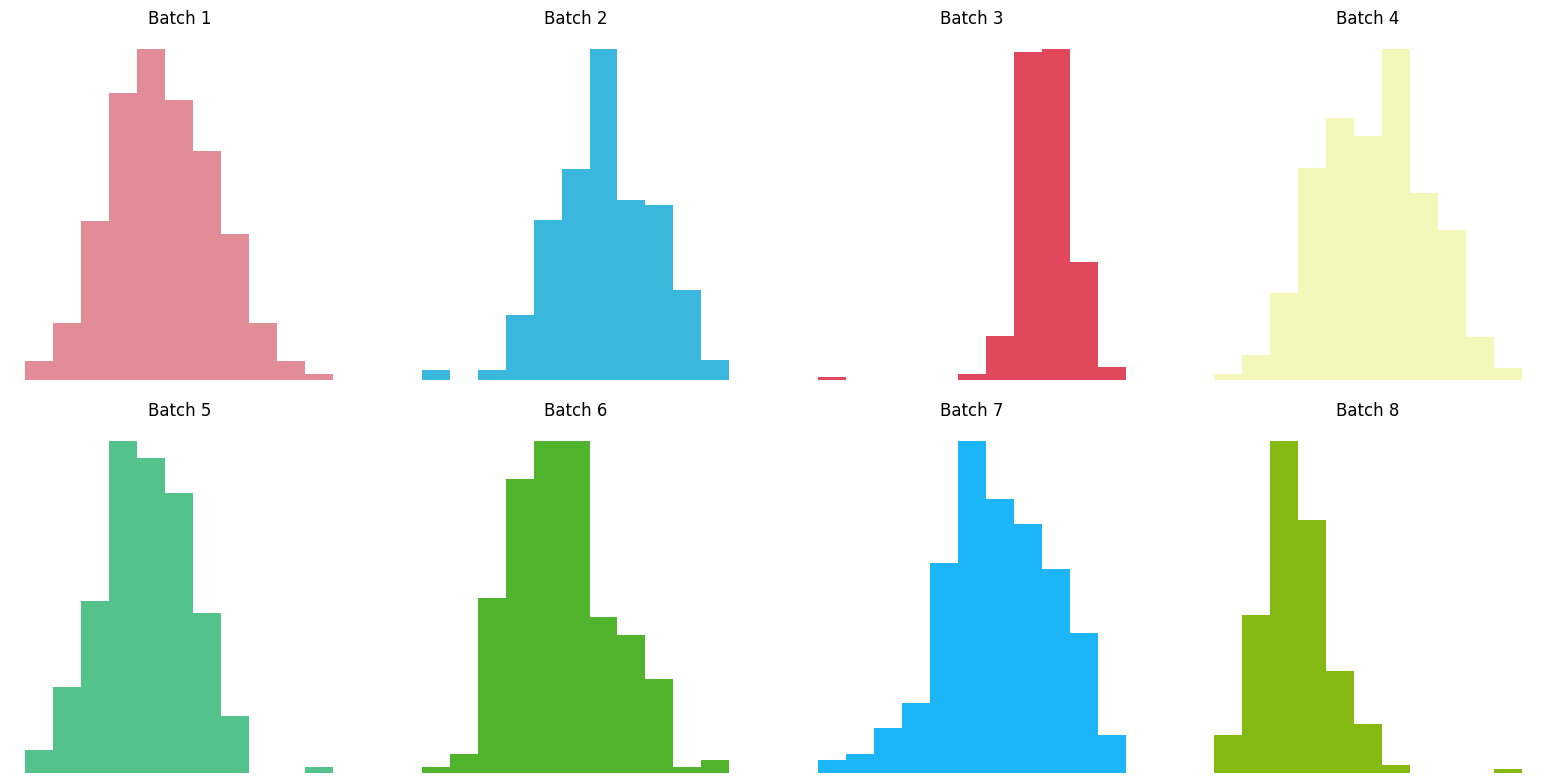

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)
fig.tight_layout()
weights_by_batches = {}
freqs_by_batches = {}
bin_edges_by_batches = {}

for batch_number, ax in zip(range(min(df['batch']), max(df['batch']) + 1), axes.flatten()):
    weights = df[df['batch'] == batch_number]['weight']
    weights_by_batches[batch_number] = np.array(weights)
    histogram_weight, bin_edges_weight = np.histogram(weights, bins=num_bins)
    freqs_by_batches[batch_number] = histogram_weight
    bin_edges_by_batches[batch_number] = bin_edges_weight
    color = np.random.rand(3,)
    ax.hist(weights, bins=num_bins, color=color)
    ax.set_xlabel('Weight')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Batch {batch_number}')

for ax in axes.flatten():
    ax.axis('off')

In [17]:
for batch, freq in freqs_by_batches.items():
    new_bin_edges = [-np.inf]  # Начинаем с первой границы
    new_observed_freq = []  # Создаем новый список для наблюдаемых частот
    current_bin_freq = 0  # Счетчик значений в текущем интервале

    for i in range(1, len(bin_edges_by_batches[batch])):
        current_bin_freq += freq[i - 1]
        if current_bin_freq >= 3:
            new_bin_edges.append(bin_edges_by_batches[batch][i])
            new_observed_freq.append(current_bin_freq)
            current_bin_freq = 0

    # Последний интервал (если он остался) добавляем в последний интервал
    if current_bin_freq > 0:
        new_observed_freq[-1] += current_bin_freq

    # Преобразуем списки в массивы numpy
    new_observed_freq = np.array(new_observed_freq)
    new_bin_edges = np.array(new_bin_edges)
    new_bin_edges[-1] = np.inf

    freqs_by_batches[batch] = new_observed_freq / len(weights_by_batches[batch])
    bin_edges_by_batches[batch] = new_bin_edges

In [18]:
freqs_by_batches

{1: array([0.012, 0.036, 0.1  , 0.18 , 0.208, 0.176, 0.144, 0.092, 0.036,
        0.016]),
 2: array([0.016, 0.052, 0.128, 0.168, 0.264, 0.144, 0.14 , 0.072, 0.016]),
 3: array([0.012, 0.052, 0.388, 0.392, 0.14 , 0.016]),
 4: array([0.02 , 0.056, 0.136, 0.168, 0.156, 0.212, 0.12 , 0.096, 0.036]),
 5: array([0.016, 0.06 , 0.12 , 0.232, 0.22 , 0.196, 0.112, 0.044]),
 6: array([0.016, 0.112, 0.188, 0.212, 0.212, 0.1  , 0.088, 0.06 , 0.012]),
 7: array([0.02 , 0.028, 0.044, 0.132, 0.208, 0.172, 0.156, 0.128, 0.088,
        0.024]),
 8: array([0.04 , 0.168, 0.352, 0.268, 0.108, 0.052, 0.012])}

In [19]:
bin_edges_by_batches

{1: array([      -inf, 7.44736364, 7.46572727, 7.48409091, 7.50245455,
        7.52081818, 7.53918182, 7.55754545, 7.57590909, 7.59427273,
               inf]),
 2: array([      -inf, 7.45345455, 7.47327273, 7.49309091, 7.51290909,
        7.53272727, 7.55254545, 7.57236364, 7.59218182,        inf]),
 3: array([ -inf, 7.429, 7.467, 7.505, 7.543, 7.581,   inf]),
 4: array([      -inf, 7.47454545, 7.48981818, 7.50509091, 7.52036364,
        7.53563636, 7.55090909, 7.56618182, 7.58145455,        inf]),
 5: array([      -inf, 7.46963636, 7.48827273, 7.50690909, 7.52554545,
        7.54418182, 7.56281818, 7.58145455,        inf]),
 6: array([      -inf, 7.45990909, 7.47836364, 7.49681818, 7.51527273,
        7.53372727, 7.55218182, 7.57063636, 7.58909091,        inf]),
 7: array([      -inf, 7.44990909, 7.46636364, 7.48281818, 7.49927273,
        7.51572727, 7.53218182, 7.54863636, 7.56509091, 7.58154545,
               inf]),
 8: array([      -inf, 7.46018182, 7.48936364, 7.51854545, 7.547

In [27]:
info = pd.DataFrame({'Batch': [], 'Mean': [], 'Conf_int for mean': [], 'Std': [], 'Dev': [], 'Conf_int for dev': []})
for batch, weight in weights_by_batches.items():
    mean = np.mean(weight)
    std_dev = np.std(weight)
    dev = np.var(weight)
    info.loc[batch, 'Batch'] = batch
    info.loc[batch, 'Mean'] = mean
    info.loc[batch, 'Std'] = std_dev
    info.loc[batch, 'Dev'] = dev
    n_batch = len(weight)
    a_est_left = mean - stats.t.ppf(1 - gamma / 2, n_batch - 1) * std_dev / np.sqrt(n_batch-1)
    a_est_right = mean + stats.t.ppf(1 - gamma / 2, n_batch - 1) * std_dev / np.sqrt(n_batch-1)
    info.loc[batch, 'Conf_int for mean'] = '('+str(a_est_left)+'; '+str(a_est_right)+')'
    chi_1_batches = stats.chi2.ppf(q=1 - gamma / 2, df=n_batch - 1)
    chi_2_batches = stats.chi2.ppf(q=gamma / 2, df=n_batch - 1)
    d_est_left = n_batch * dev / chi_1_batches
    d_est_right = n_batch * dev / chi_2_batches
    info.loc[batch, 'Conf_int for dev'] = '('+str(d_est_left)+'; '+str(d_est_right)+')'
info

,Batch,Mean,Conf_int for mean,Std,Dev,Conf_int for dev
1,1.0,7.519656,(7.519519588148403; 7.519792411851598),0.034293,0.001176,(0.0011772328475422606; 0.001190554341235145)
2,2.0,7.523168,(7.5230271250259095; 7.523308874974092),0.035415,0.001254,(0.0012555264373568687; 0.0012697338964431637)
3,3.0,7.509544,(7.50939695064762; 7.50969104935238),0.036967,0.001367,(0.0013679946406634387; 0.0013834747829441644)
4,4.0,7.531104,(7.53098721871658; 7.53122078128342),0.029358,0.000862,(0.0008627891028457871; 0.0008725523706783532)
5,5.0,7.531396,(7.531278390106915; 7.531513609893087),0.029566,0.000874,(0.0008750762035391659; 0.0008849785114390666)
6,6.0,7.515240,(7.515107309289805; 7.515372690710194),0.033357,0.001113,(0.0011138820379468775; 0.0011264866578180486)
7,7.0,7.523016,(7.522884998549561; 7.523147001450438),0.032932,0.001085,(0.0010857013352536455; 0.001097987064045645)
8,8.0,7.516736,(7.516591595630349; 7.516880404369651),0.036302,0.001318,(0.0013192248816055994; 0.0013341531483257263)


In [21]:
expected_freq_by_batches = {}
for batch, freq in freqs_by_batches.items():
    expected_freq = []

    for i in range(len(bin_edges_by_batches[batch]) - 1):
        lower_bound = bin_edges_by_batches[batch][i]
        upper_bound = bin_edges_by_batches[batch][i + 1]
        expected_count = stats.norm.cdf(upper_bound, loc=info.loc[batch, 'Mean'], scale=info.loc[batch, 'Std']) - stats.norm.cdf(lower_bound, loc=info.loc[batch, 'Mean'], scale=info.loc[batch, 'Std'])
        expected_freq.append(expected_count)

    expected_freq_by_batches[batch] = expected_freq

In [22]:
for batch, weight in weights_by_batches.items():
    chi_squared_statistic, chi_squared_p_value = stats.chisquare(f_obs=freqs_by_batches[batch], f_exp=expected_freq_by_batches[batch], ddof=2)
    ks_statistic, ks_p_value = stats.kstest(weight, 'norm', args=(info.loc[batch, 'Mean'], info.loc[batch, 'Std']))
    omega2_statistic, omega2_p_value = stats.shapiro(weight)
    alpha = 0.05
    print('Пакет №', batch)
    if chi_squared_p_value < alpha:
        print("Выборка не имеет нормальное распределение по Пирсону (p-value =", chi_squared_p_value, ")")
    else:
        print("Выборка имеет нормальное распределение по Пирсону (p-value =", chi_squared_p_value, ")")
    if ks_p_value < alpha:
        print("Выборка не имеет нормальное распределение по Колмогорову (p-value =", ks_p_value, ")")
    else:
        print("Выборка имеет нормальное распределение по Колмогорову (p-value =", ks_p_value, ")")
    if omega2_p_value < alpha:
        print("Выборка не имеет нормальное распределение по Шапиро (p-value =", omega2_p_value, ")")
    else:
        print("Выборка имеет нормальное распределение по Шапиро (p-value =", omega2_p_value, ")")

Пакет № 1
Выборка имеет нормальное распределение по Пирсону (p-value = 0.9999999991383405 )
Выборка имеет нормальное распределение по Колмогорову (p-value = 0.832309916274967 )
Выборка имеет нормальное распределение по Шапиро (p-value = 0.68293696641922 )
Пакет № 2
Выборка имеет нормальное распределение по Пирсону (p-value = 0.9999989892632116 )
Выборка имеет нормальное распределение по Колмогорову (p-value = 0.9467274746733476 )
Выборка имеет нормальное распределение по Шапиро (p-value = 0.12186499685049057 )
Пакет № 3
Выборка имеет нормальное распределение по Пирсону (p-value = 0.9970124088755846 )
Выборка имеет нормальное распределение по Колмогорову (p-value = 0.09458127636707048 )
Выборка не имеет нормальное распределение по Шапиро (p-value = 4.0891918215262e-14 )
Пакет № 4
Выборка имеет нормальное распределение по Пирсону (p-value = 0.9999992288321939 )
Выборка имеет нормальное распределение по Колмогорову (p-value = 0.6543178209813991 )
Выборка имеет нормальное распределение по 